# Problem 4

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import copy


# Data given from the problem
data = [
    [1, 4, 1],
    [1, 3, 1],
    [0, 4, 1],
    [4, 3, 1],
    [6, 2, 1],
    [4, 0, 1]
]


# Function to calculate Euclidean distance between two points
def euclidean(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)


# Calculate the  centroids of each class of data
def get_centroids():
    c1count = 0
    c2count = 0
    c1 = [0, 0]
    c2 = [0, 0]
    for d in data:
        if d[2] == 1:
            c1[0] += d[0]
            c1[1] += d[1]
            c1count += 1
        else:
            c2[0] += d[0]
            c2[1] += d[1]
            c2count += 1
    c1 = [c1[0] / c1count, c1[1] / c1count]
    c2 = [c2[0] / c2count, c2[1] / c2count]
    return c1, c2

### Problem 4A: Plot the Data

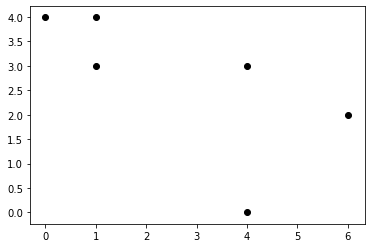

In [81]:
for d in data:
    plt.scatter(d[0], d[1], color='k')

### Problem 4B: Randomly Assign Cluster Labels

In [82]:
# Randomly assign cluster labels; do-twhile loop ensures at least 1 elt in each class
while True:
    for i in range(len(data)):
        data[i][2] = random.randint(1, 2)
    if len(set([elt[2] for elt in data])) == 2:
        break
        
print("Randomly assigned cluster labels: ")
for idx in range(len(data)):
    print(f"Observation {idx + 1}: {data[idx][2]}")


Randomly assigned cluster labels: 
Observation 1: 2
Observation 2: 1
Observation 3: 2
Observation 4: 2
Observation 5: 1
Observation 6: 1


### Problem 4C: Calculate Centroids

Centroid 1:  [3.6666666666666665, 1.6666666666666667]
Centroid 2:  [1.6666666666666667, 3.6666666666666665]


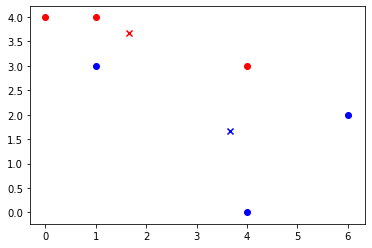

In [83]:
c1, c2 = get_centroids()
print("Centroid 1: ", c1)
print("Centroid 2: ", c2)

for d in data:
    color = 'r'
    if d[2] == 1:
        color = 'b'
    plt.scatter(d[0], d[1], color=color)
# Plot centroids as 'x's
plt.scatter(c1[0], c1[1], marker='x', color='b')
plt.scatter(c2[0], c2[1], marker='x', color='r')

Observation Labels After 1 Iterations: 
Observation 1: 2
Observation 2: 2
Observation 3: 2
Observation 4: 1
Observation 5: 1
Observation 6: 1
Final Observation Labels: 
Observation 1: 2
Observation 2: 2
Observation 3: 2
Observation 4: 1
Observation 5: 1
Observation 6: 1


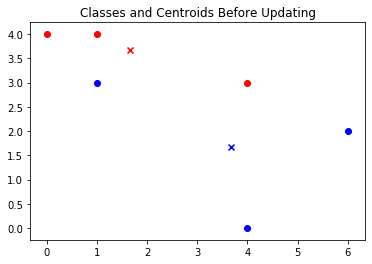

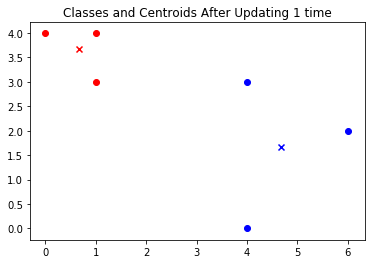

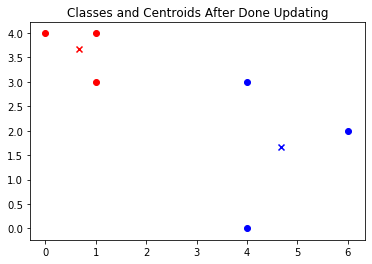

<Figure size 432x288 with 0 Axes>

In [84]:
# Plot centroids as 'x's
c1, c2 = get_centroids()
plt.scatter(c1[0], c1[1], marker='x', color='b')
plt.scatter(c2[0], c2[1], marker='x', color='r')

# Plot points and centroids before updating classes
for i in range(len(data)):
    color = 'r'
    if data[i][2] == 1:
        color = 'b'
    plt.scatter(data[i][0], data[i][1], color=color)
plt.title("Classes and Centroids Before Updating")

plt.figure()


prev_labels = []
count = 0
# Run until labels stop uppdating
while True:
    count += 1
    prev_labels = copy.deepcopy(data)
    # Update classes of each data point based on their distance to each centroid
    for i in range(len(data)):
        color = 'r'
        # If euclidiean distance to 1 is less than 2, assign point to 1.
        if euclidean(data[i], c1) < euclidean(data[i], c2):
            data[i][2] = 1
            color = 'b'
        else:
            data[i][2] = 2
        plt.scatter(data[i][0], data[i][1], color=color)

    # Update centroids based on updated class data points
    c1, c2 = get_centroids()

    plt.scatter(c1[0], c1[1], marker='x', color='b')
    plt.scatter(c2[0], c2[1], marker='x', color='r')
    

    
    if prev_labels == data:
        plt.title(f"Classes and Centroids After Done Updating")
        plt.figure()
        print("Final Observation Labels: ")
        for idx in range(len(data)):
            print(f"Observation {idx + 1}: {data[idx][2]}")
        break
    else:
        s = "time" if count == 1 else "times"
        plt.title(f"Classes and Centroids After Updating {count} {s}")
        plt.figure()
        print(f"Observation Labels After {count} Iterations: ")
        for idx in range(len(data)):
            print(f"Observation {idx + 1}: {data[idx][2]}")
    


